# TikTok User Verification Logistic Regression Model

### **Task 1. Imports and loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the TikTok dataset.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe(include="all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data=data.dropna(axis=0)

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

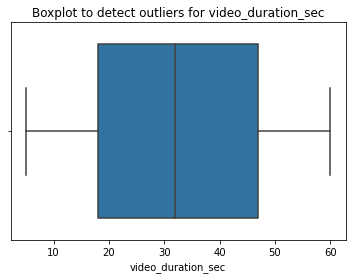

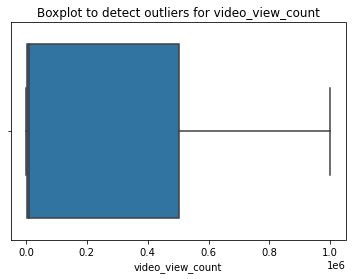

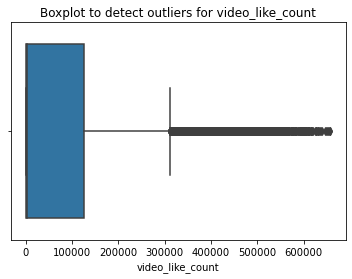

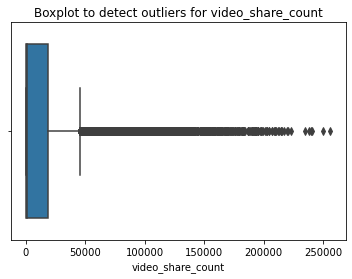

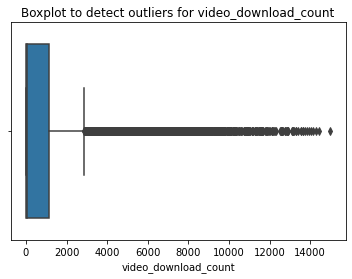

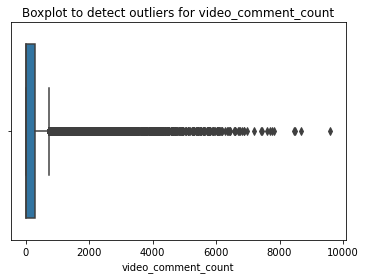

In [12]:
# List of variables for which we want to check the outliers
ind_var_list = ["video_duration_sec", "video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count"]

# Loop through each variable in the list
for i in ind_var_list:
    # Create a new figure and axis for each boxplot
    fig, ax = plt.subplots()
    
    # Set the title for the boxplot with the current variable name
    plt.title(f"Boxplot to detect outliers for {i}", fontsize=12)
    
    # Create a boxplot and display it.
    sns.boxplot(data=data, x=i)
    plt.show()

Mitigating the impact of outliers on analysis and modeling.

In [13]:
# List of variables containing outliers
outlier_list = ["video_like_count", "video_share_count", "video_download_count", "video_comment_count"]

# Loop through each variable in the outlier list
for o in outlier_list:
    # Calculate the 75th percentile (Q3) of the variable's data
    perc_75 = data[o].quantile(0.75)
    
    # Calculate the 25th percentile (Q1) of the variable's data
    perc_25 = data[o].quantile(0.25)
    
    # Calculate the interquartile range (IQR) for the variable
    iqr = perc_75 - perc_25
    
    # Calculate the upper limit for detecting outliers using 1.5 times the IQR
    upper_limit = perc_75 + 1.5 * iqr
    
    # Replace values in the variable's data that are above the upper limit with the upper limit value
    data.loc[data[o] > upper_limit, o] = upper_limit

In [14]:
#Find the percentage of verified status to check the class balances.
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Use resampling to create class balance in the outcome variable.

In [15]:
# Use resampling to create class balance in the outcome variable.
# Identify data points from majority and minority classes

data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class ("verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

Inserting length of transcription as a variable.

In [16]:
# Get the average `video_transcription_text` length for verified and unverified accounts.
data_upsampled.groupby("verified_status")["video_transcription_text"].apply(lambda group: np.mean(group.str.len()))

verified_status
not verified    89.401141
verified        84.569559
Name: video_transcription_text, dtype: float64

In [17]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [18]:
# Display first few rows of dataframe after adding new column
data_upsampled.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.000,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.000,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.000,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.000,34812.0,1234.000,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.000,152.0,128
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.000,45382.5,2880.125,728.5,127
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,311333.875,45382.5,2880.125,728.5,95
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.000,50.0,22.000,11.0,99
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.000,1050.0,53.000,27.0,103
9,11,claim,8095102436,47,someone shared with me that an average user sp...,not verified,active,695641.0,238030.000,23062.0,1719.000,378.0,83


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

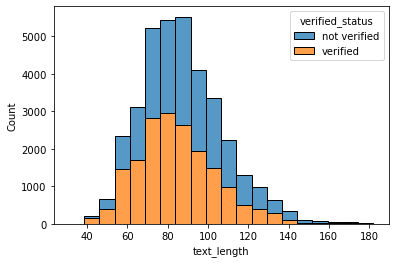

In [19]:
# Create two histograms in one plot

sns.histplot(data=data_upsampled, multiple="stack", x="text_length", hue="verified_status", bins=20);

### **Task 2b. Examine correlations**

In [20]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.619090,-0.611317,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,-0.000888,0.012784,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.001875,0.008972,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.794957,0.782352,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.888427,0.873458,0.818032,0.216693
video_share_count,-0.619090,-0.000888,0.001875,0.794957,0.888427,1.000000,0.803551,0.766203,0.208529
video_download_count,-0.611317,0.012784,0.008972,0.782352,0.873458,0.803551,1.000000,0.911894,0.216871
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.766203,0.911894,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.208529,0.216871,0.217661,1.000000


Visualize a correlation heatmap of the data.

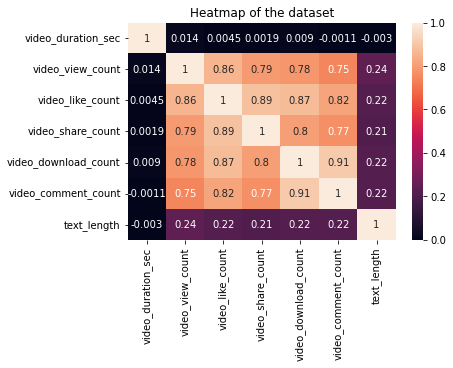

In [21]:
# Create a heatmap to visualize how correlated variables are
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]].corr(), annot=True)
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, we could exclude video_like_count as it is the variable highly correlated with other variables.

### **Task 3a. Select variables**

In [22]:
# Select outcome variable
y=data_upsampled["verified_status"]

In [23]:
# Select features
X=data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [25]:
# Get shape of each training and testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26826, 7)
(8942, 7)
(26826,)
(8942,)


### **Task 3c. Encode variables**

In [26]:
# Check data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

In [27]:
# Select the training features that needs to be encoded
X_train_to_encode=X_train[["author_ban_status", "claim_status"]]

# Display first few rows
X_train_to_encode.head()

,author_ban_status,claim_status
33058,active,opinion
20491,active,opinion
25583,active,opinion
18474,active,opinion
27312,active,opinion


In [28]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

# Get feature names from encoder
X_encoder.get_feature_names()

array(['x0_banned', 'x0_under review', 'x1_opinion'], dtype=object)

In [29]:
# Display first few rows of encoded training features
X_train_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [30]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df =pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names())

# Display first few rows
X_train_encoded_df.head()

,x0_banned,x0_under review,x1_opinion
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [31]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# We will drop "claim_status" and "author_ban_status", since these features are being transformed to numeric.
X_train_final=pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,x0_banned,x0_under review,x1_opinion
0,33,2252.0,23.0,4.0,0.0,0.0,0.0,1.0
1,52,6664.0,550.0,53.0,2.0,0.0,0.0,1.0
2,37,6327.0,257.0,3.0,0.0,0.0,0.0,1.0
3,57,1702.0,28.0,0.0,0.0,0.0,0.0,1.0
4,21,3842.0,101.0,1.0,0.0,0.0,0.0,1.0


Check the data type of the outcome variable.

In [32]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [33]:
y_train

33058        verified
20491        verified
25583        verified
18474        verified
27312        verified
             ...     
20757        verified
32103        verified
30403        verified
21243        verified
2732     not verified
Name: verified_status, Length: 26826, dtype: object

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

In [34]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder=OneHotEncoder(drop="first", sparse=False)

# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

In [35]:
# Construct a logistic regression model and fit it to the training set
log_clf=LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### **Taks 4a. Results and evaluation**

Evaluate the model.

Encode categorical features in the testing set using the same method.

In [36]:
# Select the testing features that needs to be encoded
X_test_to_encode=X_test[["author_ban_status", "claim_status"]]

# Display first few rows
X_test_to_encode.head()

,author_ban_status,claim_status
21061,active,opinion
31748,active,opinion
20197,active,claim
5727,active,claim
11607,active,opinion


In [37]:
# Transform the testing features using the encoder
X_test_encoded=X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [38]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df=pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names())

# Display first few rows
X_test_encoded_df

,x0_banned,x0_under review,x1_opinion
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
8937,0.0,0.0,1.0
8938,0.0,0.0,1.0
8939,0.0,0.0,1.0
8940,0.0,1.0,0.0


In [39]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for testing data (`X_test_final`)
# We will drop "claim_status" and "author_ban_status", since these features are being transformed to numeric.
X_test_final=pd.concat([X_test.drop(columns=(["claim_status", "author_ban_status"])).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,x0_banned,x0_under review,x1_opinion
0,41,2118.0,57.0,5.000,2.0,0.0,0.0,1.0
1,27,5701.0,157.0,1.000,0.0,0.0,0.0,1.0
2,31,449767.0,45382.5,2880.125,728.5,0.0,0.0,0.0
3,19,792813.0,45382.5,2880.125,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.000,2.0,0.0,0.0,1.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [40]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred=log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [41]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [42]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [43]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final=y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [44]:
# Get shape of each training and testing set
X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape

((26826, 8), (8942, 8), (26826,), (8942,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

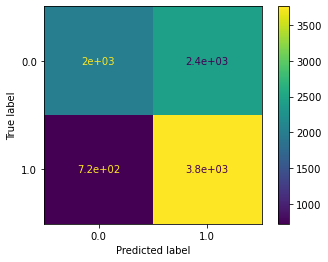

In [45]:
# Compute values for confusion matrix
log_cm=confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp=ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [46]:
# Create a classification report
target_labels=["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      4459
not verified       0.61      0.84      0.70      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.67      0.65      0.63      8942



### **Task 4c. Interpret model coefficients**

In [47]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":X_test_final.columns, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008507
1,video_view_count,-0.000002
2,video_share_count,0.000007
3,video_download_count,-0.000241
4,video_comment_count,0.000022
5,x0_banned,-0.000020
6,x0_under review,-0.000002
7,x1_opinion,0.000404


### **Task 4d. Conclusion**

- Outliers have been identified in the variables "video_like_count," "video_share_count," "video_download_count," and "video_comment_count." To address this, we replaced the outlier values in these variables with the upper threshold of the interquartile range (IQR) for each variable.
- The dataset contains a few variables with strong correlations, raising concerns about multicollinearity in a logistic regression model. To address this, we opted to exclude "video_like_count" during model construction.
- According to the logistic regression findings, each additional second of video duration correlates with a 0.01 increase in the log-odds of a user having verified status.
- The logistic regression model exhibited reasonable predictive capability, with weighted average precision and recall values of 67% and 65% respectively, and an overall accuracy of 65%.
- We developed a logistic regression model using video features to predict verified status, achieving satisfactory predictive performance (67% precision and 65% recall).
- Based on the logistic regression coefficients, longer videos tend to be linked to higher odds of users having verified status.
- Minor estimated coefficients were observed for other video features within the model, implying a limited association with verified status.